In [1]:
from tire_model import TirePerformanceModel
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import fastf1

fastf1.Cache.enable_cache('/Users/nooralindeflaten/f1_ML_predictor/data/cache')

## First draft
#quicklaps = load_all_quicklaps(years=[2018,2019,2020,2021],session_types=['R','Q','FP1','FP2','FP3'])
Time	Driver	DriverNumber	LapTime	LapNumber	Stint	PitOutTime	PitInTime	Sector1Time	Sector2Time	...	IsAccurate	year	session_type	AirTemp	Humidity	Pressure	Rainfall	TrackTemp	WindDirection	WindSpeed
0	0 days 00:09:27.820000	RIC	3	78.135	2.0	NaN	NaT	NaT	0 days 00:00:20.757000	0 days 00:00:36.560000	...	True	2018	R	25.8	50.6	1015.7	True	33.8	222	0.8
1	0 days 00:09:29.267000	VET	5	78.447	2.0	1.0	NaT	NaT	0 days 00:00:20.792000	0 days 00:00:36.481000	...	True	2018	R	25.8	50.6	1015.7	True	33.8	222	0.8
2	0 days 00:09:30.286000	HAM	44	78.485	2.0	1.0	NaT	NaT	0 days 00:00:20.879000	0 days 00:00:36.490000	...	True	2018	R	25.8	50.6	1015.7	True	33.8	222	0.8
3	0 days 00:09:31.137000	RAI	7	78.414	2.0	1.0	NaT	NaT	0 days 00:00:20.887000	0 days 00:00:36.611000	...	True	2018	R	25.8	50.6	1015.7	True	33.8	222	0.8
4	0 days 00:09:32.167000	BOT	77	78.630	2.0	1.0	NaT	NaT	0 days 00:00:20.860000	0 days 00:00:36.790000	...	True	2018	R	25.8	50.6	1015.7	True	33.8	222	0.8
...	...	...	...	...	...	...	...	...	...	...	...	...	...	...	...	...	...	...	...	...	...
6612	0 days 01:11:18.234000	GIO	99	72.710	20.0	3.0	NaT	NaT	0 days 00:00:19.312000	0 days 00:00:33.899000	...	True	2021	FP3	19.3	69.2	1013.2	False	31.1	181	0.3
6613	0 days 01:11:45.891000	VET	5	74.784	23.0	3.0	NaT	NaT	0 days 00:00:19.289000	0 days 00:00:33.991000	...	True	2021	FP3	19.3	69.2	1013.2	False	31.1	181	0.3
6614	0 days 01:12:31.418000	SAI	55	74.134	27.0	4.0	NaT	NaT	0 days 00:00:18.841000	0 days 00:00:33.752000	...	True	2021	FP3	19.3	68.9	1013.2	False	31.2	131	0.5
6615	0 days 01:12:32.605000	VER	33	71.309	18.0	2.0	NaT	NaT	0 days 00:00:18.760000	0 days 00:00:33.489000	...	True	2021	FP3	19.3	68.9	1013.2	False	31.2	131	0.5
6616	0 days 01:12:52.761000	RAI	7	73.944	24.0	3.0	NaT	NaT	0 days 00:00:19.357000	0 days 00:00:34.683000	...	True	2021	FP3



# the initial tyre degregation model
import pandas as pd
def build_tire_baseline(quicklaps: pd.DataFrame):
    grouped = quicklaps.groupby(["Compound", "Stint"])
    
    baseline = grouped.agg({
        "LapTime": "mean",
        "TrackTemp": "mean",
        "AirTemp": "mean",
        "TyreLife": "mean"
    }).reset_index()

    return baseline

baseline = build_tire_baseline(quicklaps)
sns.lineplot(data=baseline, x="TyreLife", y="LapTime", hue="Compound")
plt.title("Monaco Tire Degradation Model (Historical Baseline)")
plt.show()

In [4]:
# Load data
df = pd.read_pickle("/Users/nooralindeflaten/f1_ML_predictor/data/processed/laps_with_weather_monaco.pkl")
df_test_soft = df[df['Compound'] == 'SOFT']
features = ['TyreLife', 'AirTemp','TrackTemp','Pressure']
X_train = df_test_soft[features].copy()
y_train = df_test_soft['LapTime'].copy()

model = TirePerformanceModel(degree=2)
model.fit(X_train, y_train)

# During prediction
soft_pred = [model.predict('SOFT', lap, track_temp=35, air_temp=25, pressure=1010) for lap in range(1, 21)]


TypeError: TirePerformanceModel.predict() got an unexpected keyword argument 'track_temp'

In [13]:
model = TirePerformanceModel(degree=2, include_weather=True)
model.fit(df_test)  # Should work without requiring weather columns
soft_pred = [model.predict('SOFT', lap, track_temp=35, air_temp=25, pressure=1010) for lap in range(1, 21)]


/Users/nooralindeflaten/anaconda3/envs/INF273/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/nooralindeflaten/anaconda3/envs/INF273/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/nooralindeflaten/anaconda3/envs/INF273/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/nooralindeflaten/anaconda3/envs/INF273/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/nooralindeflaten/anaconda3/envs/INF273/lib/python3.11/site-packages/sklearn/u

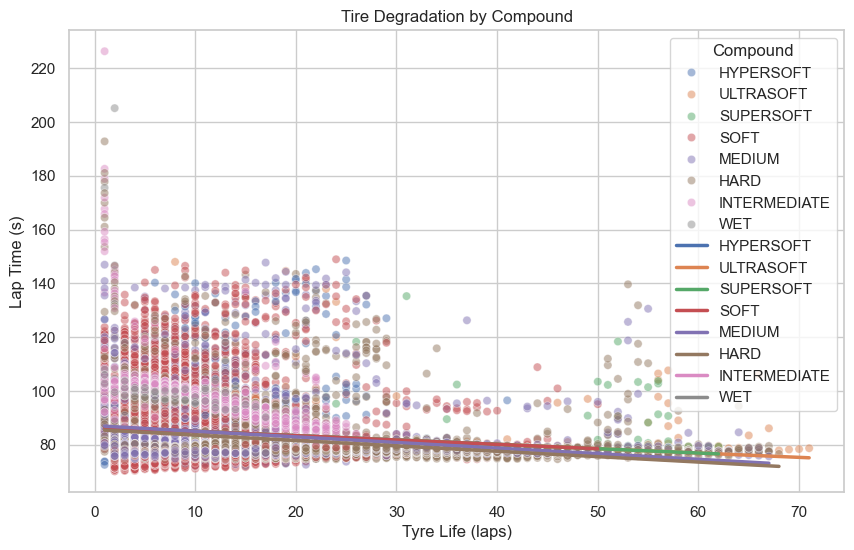

In [3]:

df['PredictedLapTime'] = model.predict_all(df)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TyreLife', y='LapTime', hue='Compound', alpha=0.5)
sns.lineplot(data=df, x='TyreLife', y='PredictedLapTime', hue='Compound', linewidth=2.5)
plt.title("Tire Degradation by Compound")
plt.xlabel("Tyre Life (laps)")
plt.ylabel("Lap Time (s)")
plt.legend(title="Compound")
plt.show()

Simulated stint times on Soft tire: [86.59846362279316, 86.4374913057494, 86.27651898870565, 86.1155466716619, 85.95457435461815, 85.79360203757439, 85.63262972053063, 85.47165740348689, 85.31068508644313, 85.14971276939937, 84.98874045235561, 84.82776813531187, 84.66679581826811, 84.50582350122436, 84.3448511841806]


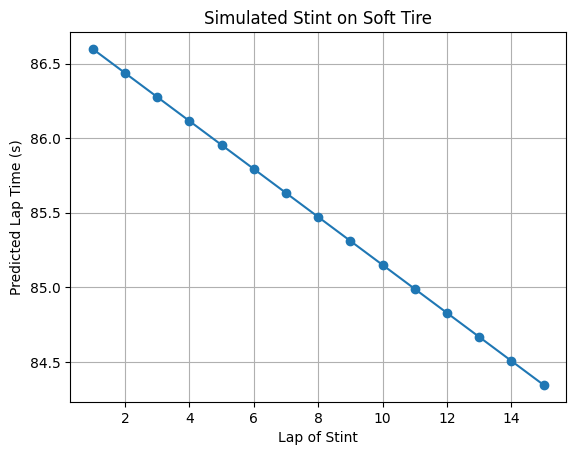

In [5]:
def simulate_stint(model, compound, starting_tyre_life, stint_length):
    """
    Simulate a stint by predicting lap times over a series of laps.
    
    Parameters:
    - model: TirePerformanceModel
    - compound: str, tire compound (e.g., 'Soft')
    - starting_tyre_life: int, the tyre life at the start of the stint
    - stint_length: int, number of laps in the stint

    Returns:
    - list of predicted lap times
    """
    times = []
    for lap_offset in range(stint_length):
        tyre_life = starting_tyre_life + lap_offset
        lap_time = model.predict(compound, tyre_life)
        times.append(lap_time)
    return times

# Let's simulate 15 laps on a Soft tire starting from 0 laps of tyre life
soft_stint_times = simulate_stint(model=model, compound="SOFT", starting_tyre_life=0, stint_length=15)
print("Simulated stint times on Soft tire:", soft_stint_times)
# Now plot it
plt.plot(range(1, 16), soft_stint_times, marker='o')
plt.xlabel('Lap of Stint')
plt.ylabel('Predicted Lap Time (s)')
plt.title('Simulated Stint on Soft Tire')
plt.grid(True)
plt.show()


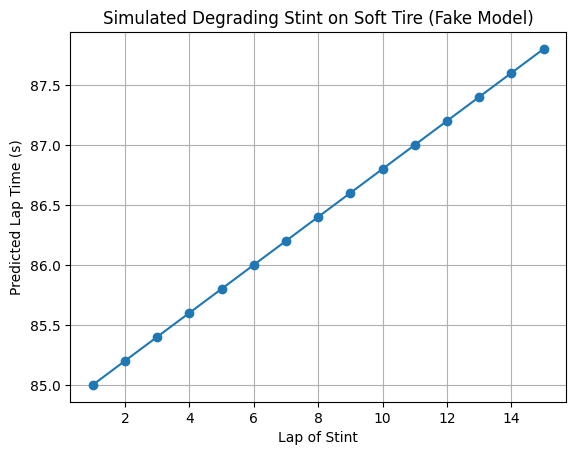

In [6]:
# Dirty quick test model:
class FakeTireModel:
    def predict(self, compound, lap_life):
        base = 85
        return base + 0.2 * lap_life  # Lap times increase by 0.2s per lap

# Use it instead:
fake_model = FakeTireModel()
soft_stint_times = simulate_stint(fake_model, compound="SOFT", starting_tyre_life=0, stint_length=15)

# Plot it
plt.plot(range(1, 16), soft_stint_times, marker='o')
plt.xlabel('Lap of Stint')
plt.ylabel('Predicted Lap Time (s)')
plt.title('Simulated Degrading Stint on Soft Tire (Fake Model)')
plt.grid(True)
plt.show()



---
  
# 🛠 Answering Your Specifics

| Question | Answer |
|:--------|:-------|
| Should we add weather into tire model? | **YES!** Add track temp, air temp, pressure as input features. |
| Should we use polynomial regression? | **YES!** Tire degradation curves are rarely linear — poly degree 2 or 3 is perfect. |
| How many combinations? | Start with simple 1-stop strategies (Soft → Medium). Later you can let the generator create many! |

---

# 📈 Timeline for us (if you want)

1. **Load Leclerc laps**  
2. **Build TirePerformanceModel**  
3. **Train Polynomial Regression models for each tire**  
4. **Simulate simple 1-stop Monaco race**  
5. **Plot real vs simulated stints**  
6. **Celebrate with cake 🍰**

---

# 🚀 Would you like me to:

- Write the TirePerformanceModel class updated with weather and polynomial regression for you?
- Write the function to load and prepare Leclerc's data?

**(I can do both very clean and quick if you want 🥰)**

---

Would you like me to? 💬✨  
*(Also: how excited are you from 1-10, I am a 14 😂)*


## Polynomial Regression

In [5]:
# Only use sessions before the race
df_fp_quali = df[df['session_type'].isin(['FP1', 'FP2', 'FP3', 'Q'])]

# Fit the model with weather data
model_1 = TirePerformanceModel(degree=2, include_weather=True)
model_1.fit(df_fp_quali)

soft_pred = [model_1.predict('Soft', lap, track_temp=35, air_temp=25, pressure=1010) for lap in range(1, 21)]
plt.plot(range(1, 21), soft_pred, label='Soft tire prediction')
plt.xlabel('Tyre life (laps)')
plt.ylabel('Predicted lap time (s)')
plt.title('Soft tire degradation with weather')
plt.legend()
plt.grid(True)
plt.show()

TypeError: TirePerformanceModel.__init__() got an unexpected keyword argument 'include_weather'